In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import seaborn as sns
plt.style.use('seaborn') 

In [2]:
df1 = pd.read_csv('ds_salaries.csv')
df = df1.loc [ df1['employment_type'] == "FT",:]
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


Text(0.5, 1.0, 'Executive-level')

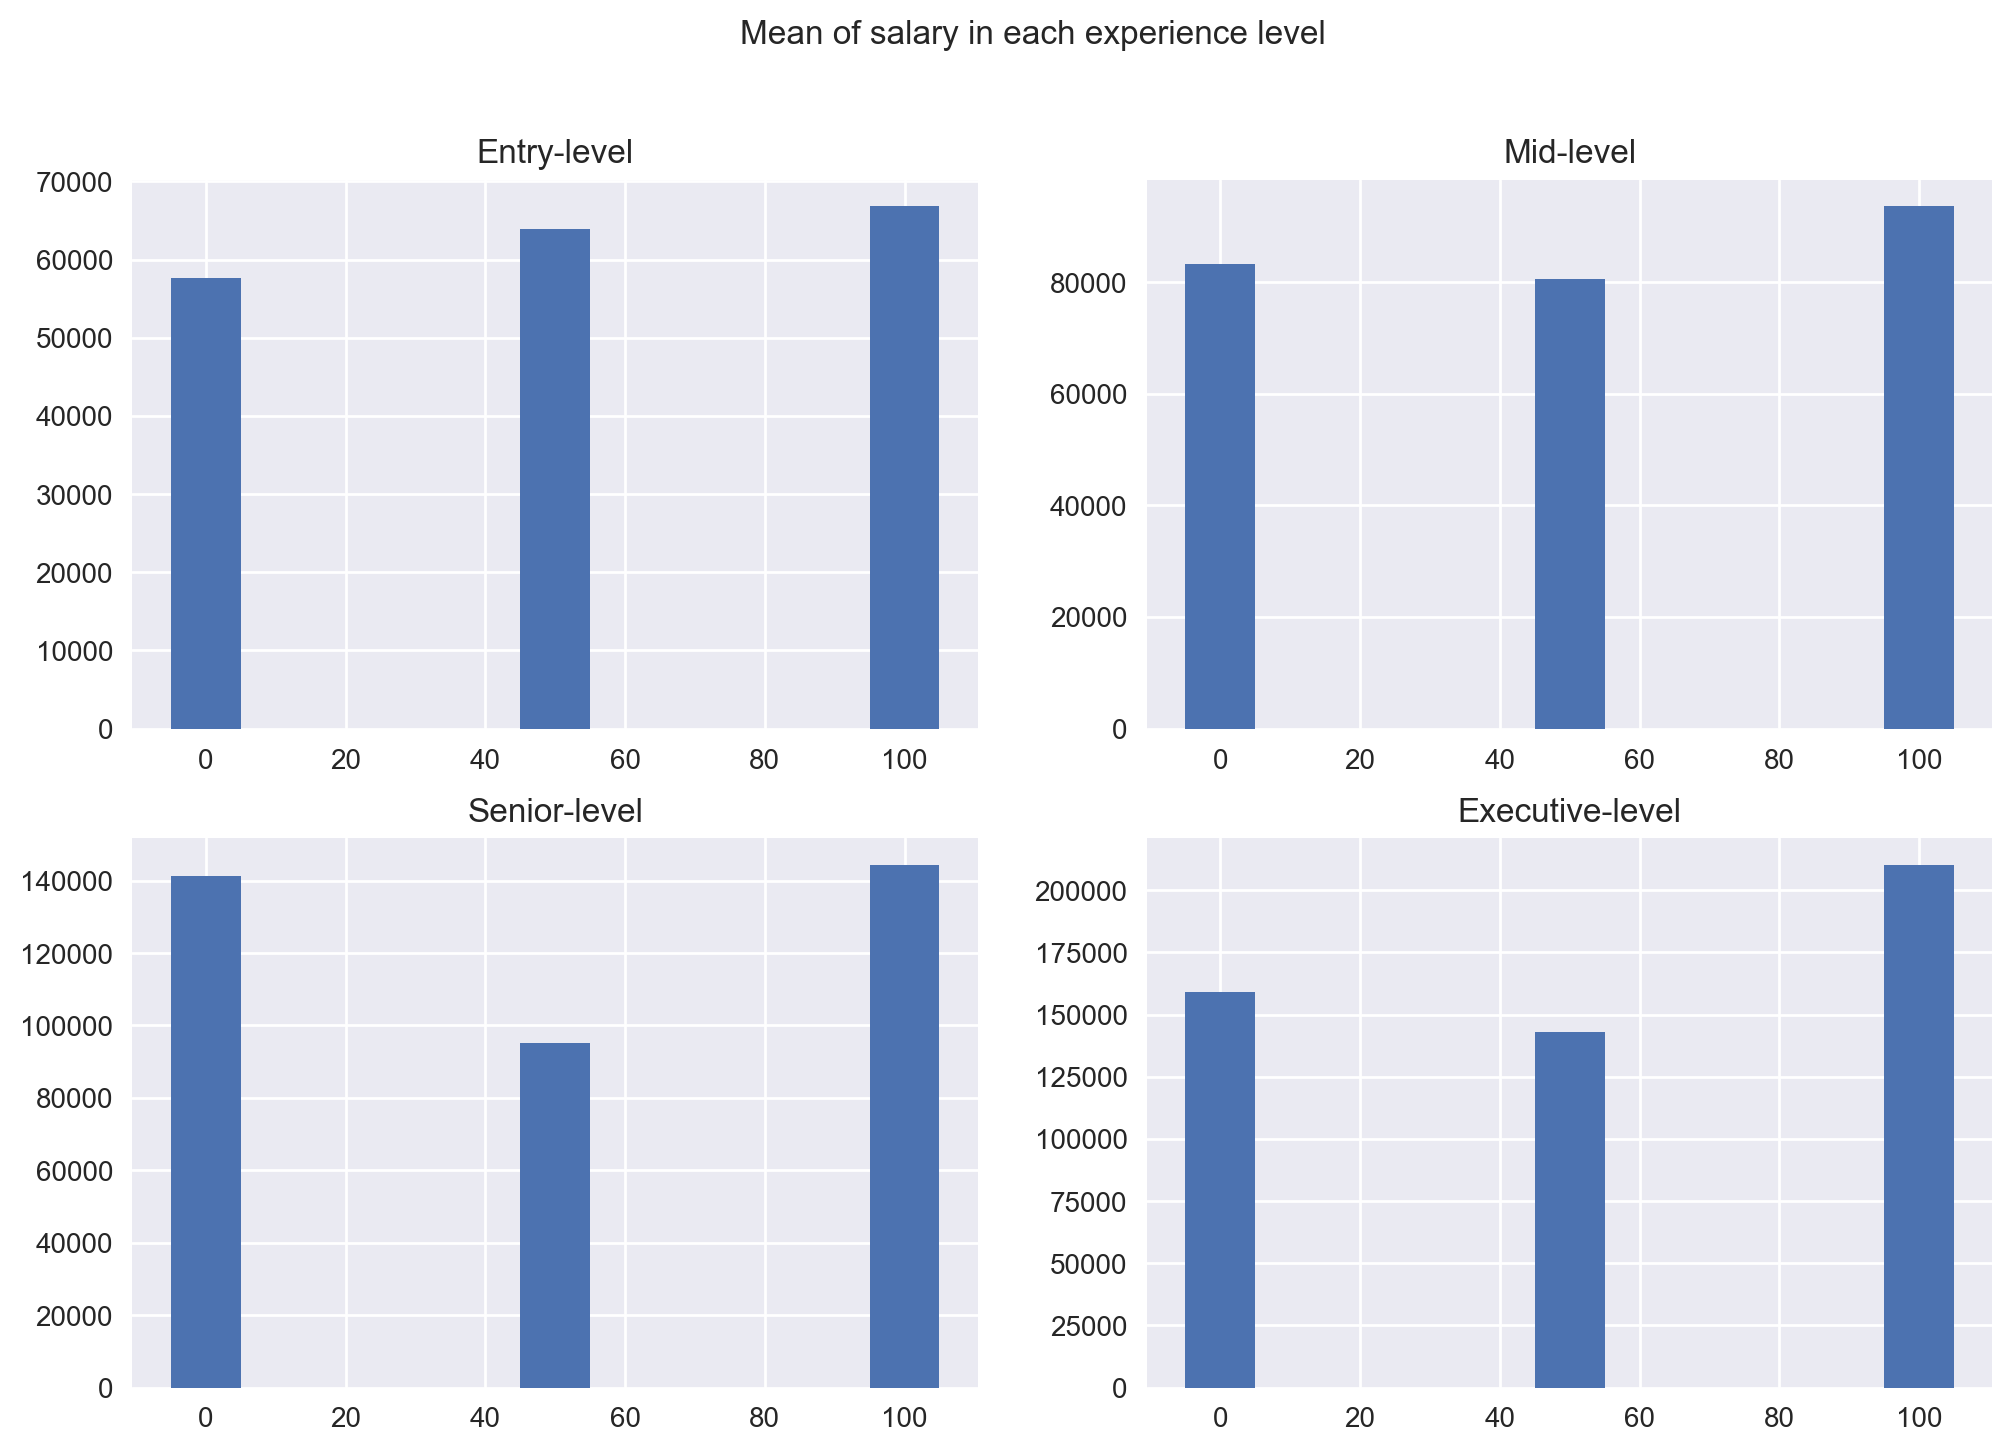

In [3]:
#subplot
# การทำงานแต่ละแบบมีรายได้แตกต่างกันอย่างไร
data = df[['experience_level','employment_type','job_title','salary_in_usd','remote_ratio']]

data1 = data.loc[ df['experience_level'] == 'EN', : ]
data1 = data1.groupby(['remote_ratio','experience_level'])[['salary_in_usd']].agg('mean')
data1 = data1.sort_values( ['salary_in_usd'], ascending=True )
data1 = data1.reset_index()


data2 = data.loc[ df['experience_level'] == 'MI', : ]
data2 = data2.groupby(['remote_ratio','experience_level'])[['salary_in_usd']].agg('mean')
data2 = data2.sort_values( ['salary_in_usd'], ascending=False )
data2 = data2.reset_index()

data3 = data.loc[ df['experience_level'] == 'SE', : ]
data3 = data3.groupby(['remote_ratio','experience_level'])[['salary_in_usd']].agg('mean')
data3 = data3.sort_values( ['salary_in_usd'], ascending=False )
data3 = data3.reset_index()

data4 = data.loc[ df['experience_level'] == 'EX', : ]
data4 = data4.groupby(['remote_ratio','experience_level'])[['salary_in_usd']].agg('mean')
data4 = data4.sort_values( ['salary_in_usd'], ascending=False )
data4 = data4.reset_index()

fig = plt.figure(figsize=(12,8),dpi=200)
(ax1, ax2), (ax3, ax4) = fig.subplots(2,2)
fig.suptitle('Mean of salary in each experience level')
list2 = ['Entry-level','Mid-level','Senior-level','Executive-level']
ax1.bar(data1['remote_ratio'], data1['salary_in_usd'],width=10)
ax1.set_title(f"{list2[0]}")
ax2.bar(data2['remote_ratio'], data2['salary_in_usd'],width=10)
ax2.set_title(f"{list2[1]}")
ax3.bar(data3['remote_ratio'], data3['salary_in_usd'],width=10)
ax3.set_title(f"{list2[2]}")
ax4.bar(data4['remote_ratio'], data4['salary_in_usd'],width=10)
ax4.set_title(f"{list2[3]}")

,experience_level,salary_in_usd,remote_ratio
0,MI,79833,0
1,SE,260000,0
2,SE,109024,50
3,MI,20000,0
4,SE,150000,50
...,...,...,...
602,SE,154000,100
603,SE,126000,100
604,SE,129000,0
605,SE,150000,100


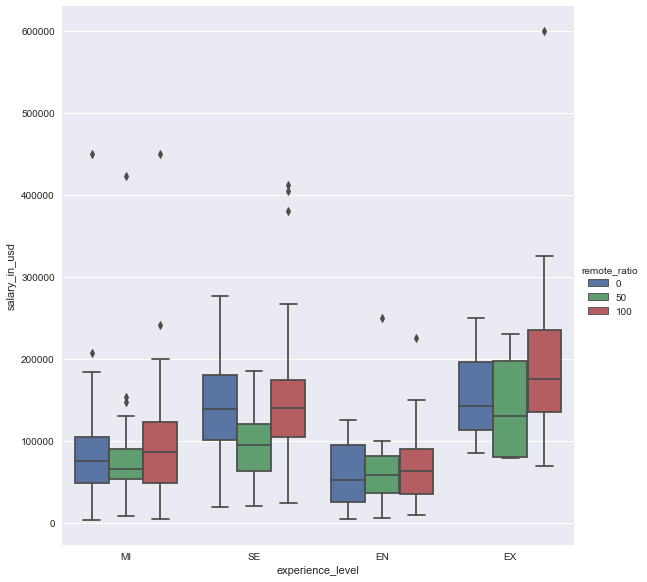

In [4]:
df = df1.loc [ df1['employment_type'] == "FT",:]
data2 = df[['experience_level','salary_in_usd','remote_ratio']]

display(data2)
sns.catplot(data=data2, kind='box',
            x='experience_level', y='salary_in_usd', 
            hue='remote_ratio',
            height=8, aspect=1)

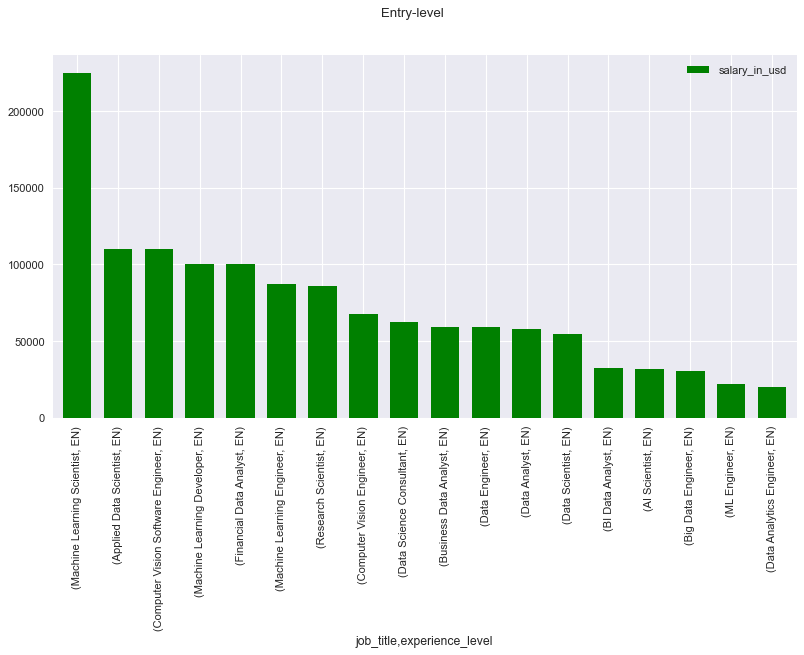

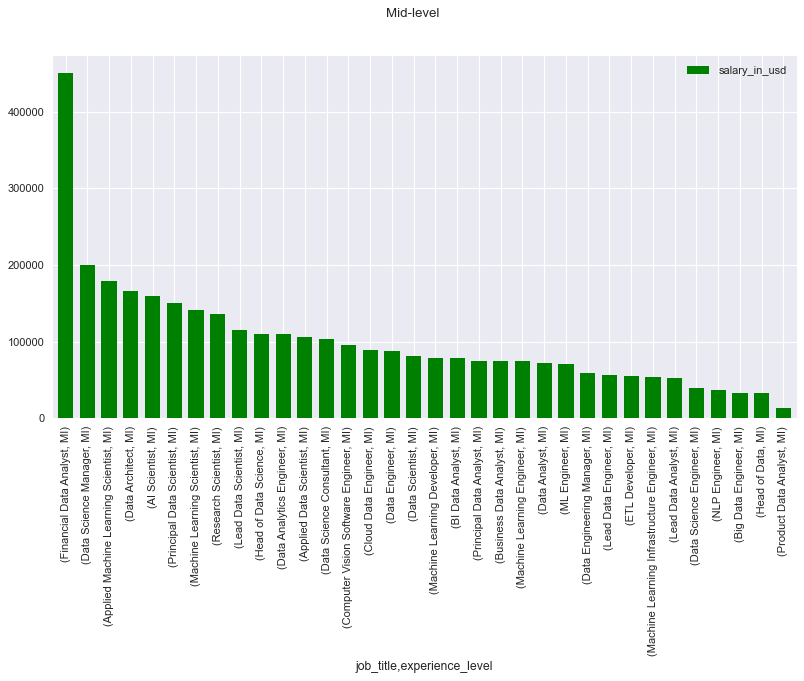

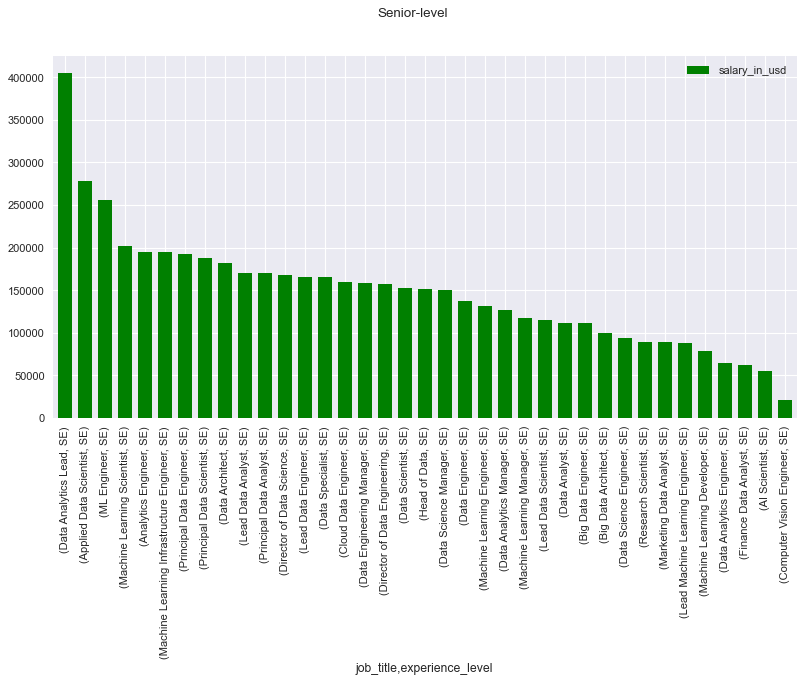

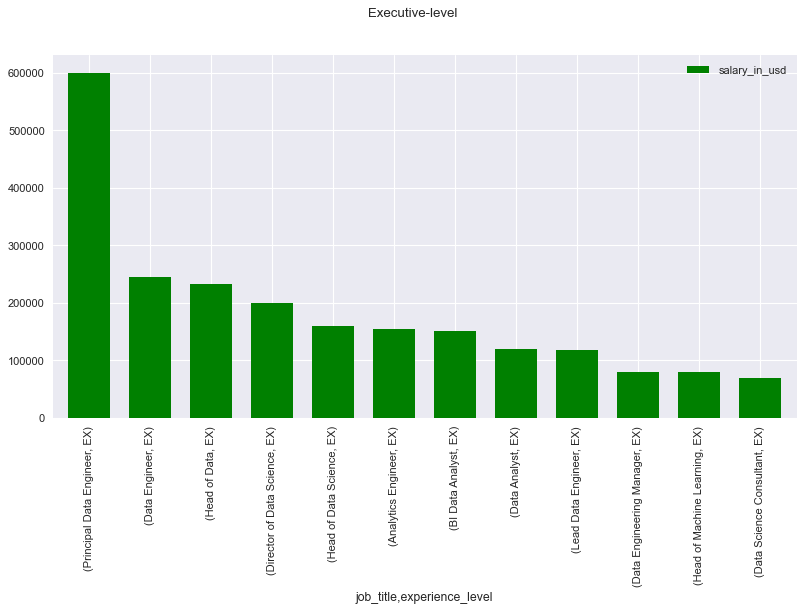

In [5]:
#ตำแหน่งงานไหนมีรายได้เฉลี่ยเยอะที่สุดในแต่ละระดับประสบการณ์
df2 = df[['experience_level','job_title','salary_in_usd']]


list1 = ['EN','MI','SE','EX']
def ans2 (x):
    list2 = ['Entry-level','Mid-level','Senior-level','Executive-level']
    k = 0
    for i in x :
        df2_1 = df2.loc[ df['experience_level'] == i, : ]
        #print(i)
        df2_1 = df2_1.groupby(['job_title','experience_level'])[['salary_in_usd']].agg('mean')
        df2_1 = df2_1.sort_values( ['salary_in_usd'], ascending=False )
        fig = plt.figure(figsize=(12,6),dpi=80)
        plt.suptitle(f'{list2[k]}')
        df2_1.plot.bar(ax=plt.axes(),color='g',width=0.7)
        k+=1
    return
ans2(list1)




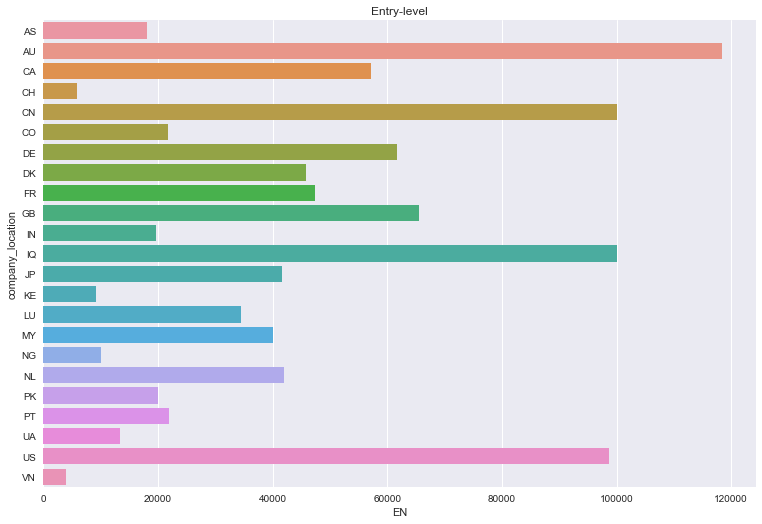

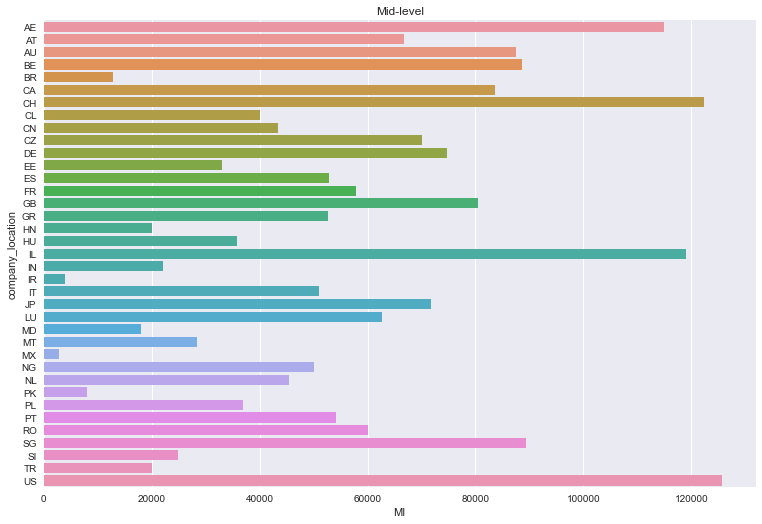

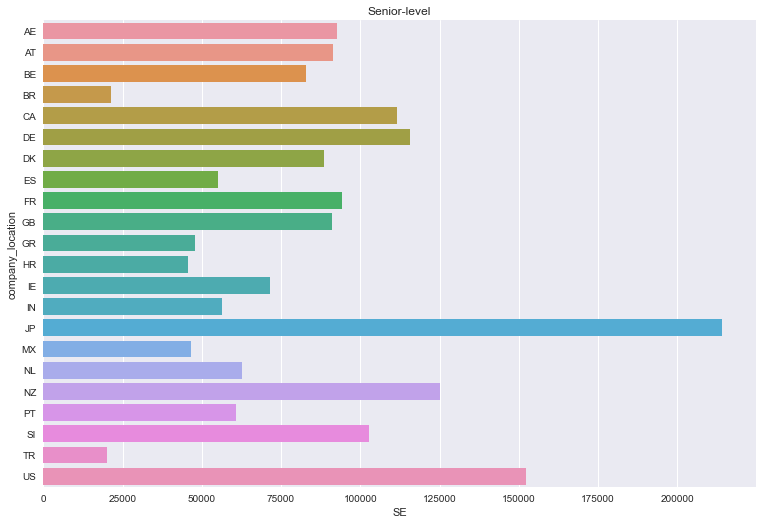

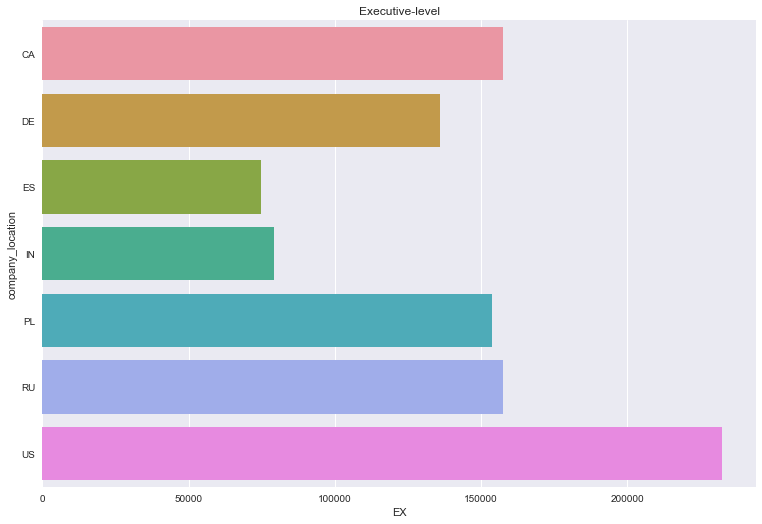

In [6]:
#บริษัทในประเทศไหนให้เงินเดือนเฉลี่ยเยอะที่สุด

df3 = df[['experience_level','salary_in_usd','company_location']]


def ans3 ():
    list1 = ['EN','MI','SE','EX']
    list2 = ['Entry-level','Mid-level','Senior-level','Executive-level']
    for i in list1 :
        
        df_pivot = df3.pivot_table( index='company_location', columns='experience_level', values='salary_in_usd', aggfunc='mean' )
        
        df_pivot1 = df_pivot[i].dropna()
       
        df_pivot1 = df_pivot1.to_frame().reset_index()
        
        
        sns.catplot(data=df_pivot1, kind='bar',
                x=i,  
                y='company_location',  
                height=7, aspect=1.5).set(title=f'{list2[list1.index(i)]}')
    
    return
    
ans3()

,work_year,experience_level,salary_in_usd
0,2020,EN,66784.529412
1,2020,EX,202416.500000
2,2020,MI,85950.062500
3,2020,SE,141784.058824
4,2021,EN,63134.534884
5,2021,EX,204528.000000
6,2021,MI,86081.858824
7,2021,SE,126913.779412
8,2022,EN,65369.315789
9,2022,EX,178313.846154


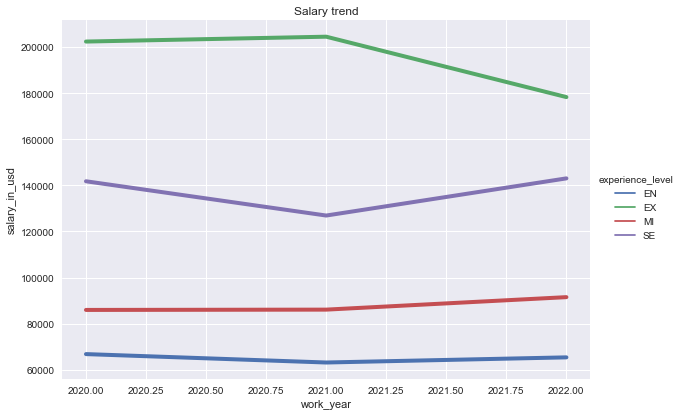

In [7]:
#เทรนได้ของประสบการณ์ทำงานแต่ละระดับ
df4 = df[['work_year','experience_level','salary_in_usd']]
df_t = df4.groupby(['work_year','experience_level'])[['salary_in_usd']].agg('mean')
df_t = df_t.sort_values( ['work_year'], ascending=True )
df_t = df_t.reset_index()
display(df_t)

sns.relplot(data=df_t, kind="line",x="work_year", y="salary_in_usd", hue="experience_level", 
            height=5.5, aspect=1.5, linewidth=4,sort=False ).set(title=f'Salary trend')


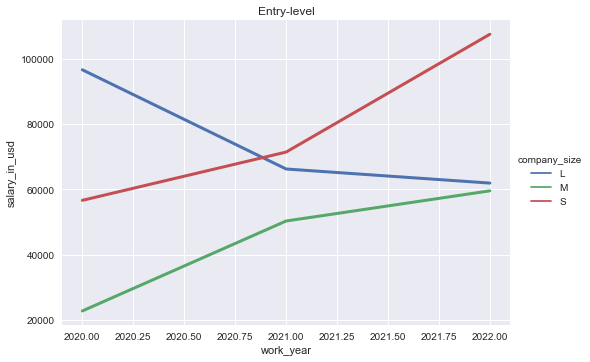

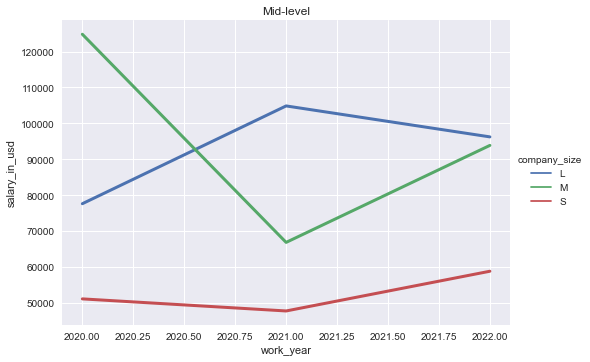

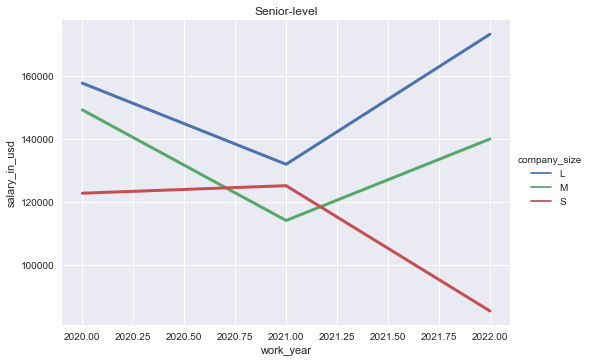

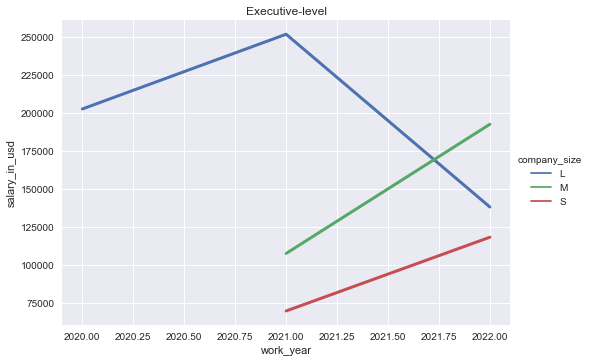

In [8]:
#แน้วโน้มเงินเดือนของบริษัทแต่ละขนาด ในแต่ละระดับประสบกาณ์
def ans5 () :
    list1 = ['EN','MI','SE','EX']
    
    list2 = ['Entry-level','Mid-level','Senior-level','Executive-level']
 
    for i in range(4):
        df5 = df[['work_year','experience_level','salary_in_usd','company_size']]
        df5 = df5.groupby(['company_size','experience_level','work_year'])[['salary_in_usd']].agg('mean')
        df5 = df5.reset_index()
        df5_1 = df5.loc[ df5['experience_level'] == list1[i]  , : ]
        #display(df5_1)
        
        sns.relplot(data=df5_1, kind="line",x="work_year", y="salary_in_usd", hue="company_size", 
                    height=4.75, aspect=1.5, linewidth=3,sort=False ).set(title=f'{list2[i]}')
        
        
    return 
ans5()

Text(0, 10, 'Data Engineer')

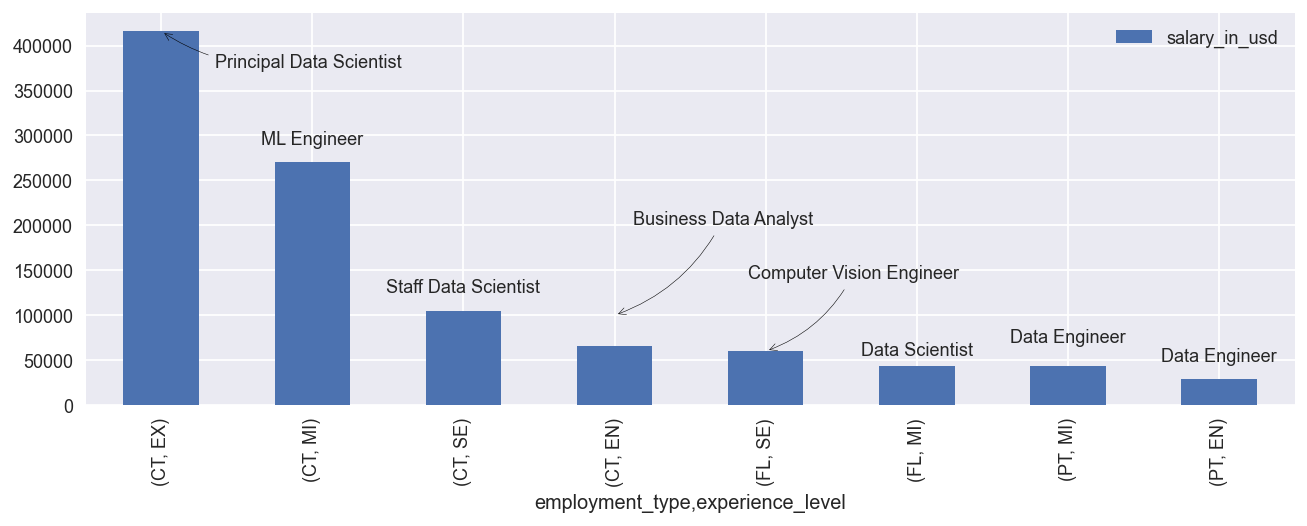

In [9]:
#ค่าเฉลี่ยรายได้ของการว่าจ้างแต่ละแบบ
dfn = df1.loc [ df1['employment_type'] != "FT",:]
dfn = dfn[['work_year','experience_level','employment_type','salary_in_usd']]

dfn = dfn.groupby(['employment_type','experience_level'])[['salary_in_usd']].agg('mean')
dfn = dfn.sort_values( ['salary_in_usd'], ascending=False )
#dfn = dfn.reset_index()

fig  = plt.figure(figsize=(12,4),dpi=130)  
ax =  plt.axes()
dfn.plot(kind='bar', ax=ax)
ax.annotate("Principal Data Scientist", 
             xy=(0, 416000 ), xycoords='data', 
             xytext=(30,-20), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

ax.annotate("ML Engineer", 
             xy=(1, 270000 ), xycoords='data', 
             xytext=(0,10), textcoords='offset points',
             ha='center')

ax.annotate("Staff Data Scientist", 
             xy=(2, 105000 ), xycoords='data', 
             xytext=(0,10), textcoords='offset points',
             ha='center')

ax.annotate("Business Data Analyst", 
             xy=(3, 100000 ), xycoords='data', 
             xytext=(10,50), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

ax.annotate("Computer Vision Engineer", 
             xy=(4, 60000 ), xycoords='data', 
             xytext=(-10,40), textcoords='offset points', 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.2'))

ax.annotate("Data Scientist", 
             xy=(5, 55000 ), xycoords='data', 
             xytext=(0,0), textcoords='offset points',
             ha='center')

ax.annotate("Data Engineer", 
             xy=(6, 69741 ), xycoords='data', 
             xytext=(0,0), textcoords='offset points',
             ha='center')

ax.annotate("Data Engineer", 
             xy=(7, 28656 ), xycoords='data', 
             xytext=(0,10), textcoords='offset points',
             ha='center')